In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import os

# # Hozirgi ishchi papkani ko‘rish
# print(os.getcwd())

# # Shu papkadagi fayllarni ko‘rish
# print(os.listdir())

df = pd.read_csv("The Titanic dataset.csv", header= 1)
df.head()
df.isna().sum()

df.isna().sum()


,sn,pclass,survived,Unnamed: 3,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2.0,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2.0,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2.0,20.25,S,04-Jan-90


In [ ]:
df.head()

In [17]:
df['age']= pd.to_numeric(df['age'], errors='coerce')
df['age']= df['age'].fillna(df['age'].mean())
df['age']= df['age'].astype(int)
most_common_g = df['gender'].mode()[0]
df['gender'] = df['gender'].fillna(most_common_g)

In [18]:
df['fare']= pd.to_numeric(df['fare'], errors='coerce')
df['fare']= df['fare'].fillna(df['fare'].mean())
common_fam= df['family'].mode()[0]
df['family']= df['family'].fillna(common_fam)

In [19]:
common_emb= df['embarked'].mode()[0]
df['embarked']= df['embarked'].fillna(common_emb)

df.head()

,sn,pclass,survived,Unnamed: 3,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0.0,7.550000,S,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0.0,7.550000,S,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,29,2.0,20.250000,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",male,29,2.0,33.462182,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2.0,20.250000,S,04-Jan-90


In [20]:
# yangi ustun yaratamiz
labels = ['0-18', '18-60', '60-80']
bins= [0, 18, 60, 80]
df['age_group']= pd.cut(df['age'], bins= bins, labels= labels, right= False)

C:\Users\HP\AppData\Local\Temp\ipykernel_4148\2590168152.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_group= df.groupby(['age_group', 'gender'])['survived'].mean()


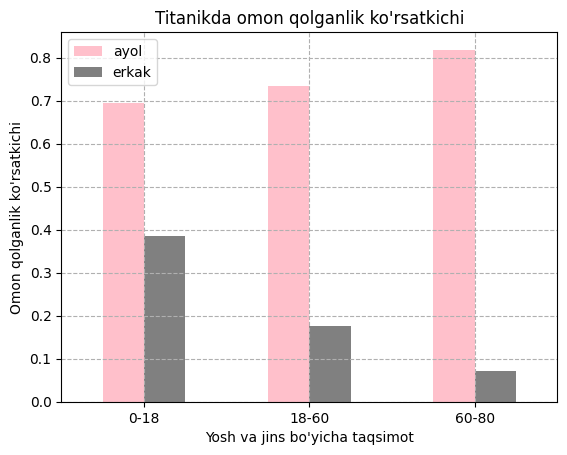

In [21]:
# bar qilamiz

by_group= df.groupby(['age_group', 'gender'])['survived'].mean()
by_group.unstack().plot(kind="bar",color= ['pink', 'grey'])
plt.legend(labels= ['ayol', 'erkak'],loc= 'upper left')
plt.xlabel("Yosh va jins bo'yicha taqsimot")
plt.ylabel("Omon qolganlik ko'rsatkichi")
plt.title("Titanikda omon qolganlik ko'rsatkichi")
plt.grid(linestyle= '--')
plt.xticks(rotation= 360)
plt.show()